# Convolutional Layer

## Creating a Filter, Edge Detection

In [51]:
# Imports
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline


import torch
import torch.nn as nn
import torch.nn.functional as F

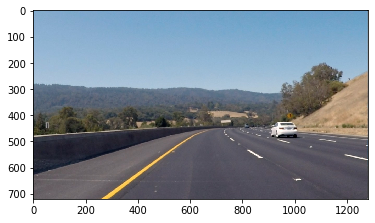

In [5]:
# Read in the image
image = mpimg.imread('cnn_img/curved_lane.jpg')
plt.imshow(image)

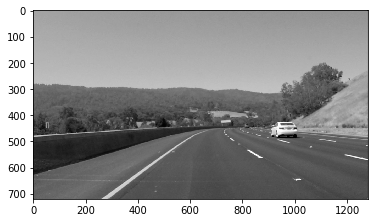

In [7]:
# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap ='gray')

### Edge Detection

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="cnn_img/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

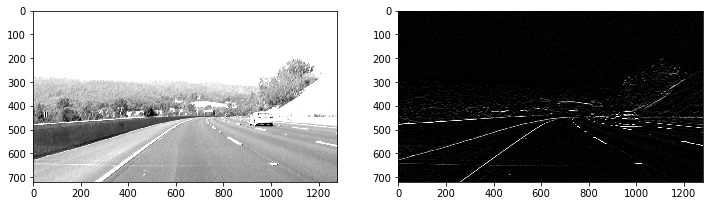

In [29]:
# Sobel X & Y

sobel_x = np.array([[-1,0,1],
                   [-2,0,2],
                   [1,0,1]])

sobel_y = np.array([[-1,-2,-1],
                   [0,0,0],
                   [1,2,1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel) 
filtered_x = cv2.filter2D(gray, -1, sobel_x) 
filtered_y = cv2.filter2D(gray, -1, sobel_y)

_, axs = plt.subplots(1, 2, figsize=(12, 12))
axs = axs.flatten()

axs[0].imshow(filtered_x, cmap='gray')
axs[1].imshow(filtered_y, cmap='gray')

---
# The Importance of Filters
What you've just learned about different types of filters will be really important as you progress through this course, especially when you get to Convolutional Neural Networks (CNNs). CNNs are a kind of deep learning model that can learn to do things like image classification and object recognition. They keep track of spatial information and learn to extract features like the edges of objects in something called a convolutional layer. Below you'll see an simple CNN structure, made of multiple layers, below, including this "convolutional layer".

![q](cnn_img/q18.png)

# Convolutional Layer
The convolutional layer is produced by applying a series of many different image filters, also known as convolutional kernels, to an input image.

![q](cnn_img/q19.png)

In the example shown, 4 different filters produce 4 differently filtered output images. When we stack these images, we form a complete convolutional layer with a depth of 4!

In the code you've been working with, you've been setting the values of filter weights explicitly, but neural networks will actually learn the best filter weights as they train on a set of image data. You'll learn all about this type of neural network later in this section, but know that high-pass and low-pass filters are what define the behavior of a network like this, and you know how to code those from scratch!

In practice, you'll also find that many neural networks learn to detect the edges of images because the edges of object contain valuable information about the shape of an object.

![q](cnn_img/q20.png)

This dog has several uniqe features such as the whiskers, tongue and teeth. For each feature a unique filter may result in the best performance of detection. Lets build a convolutional layer to visualize whats happening

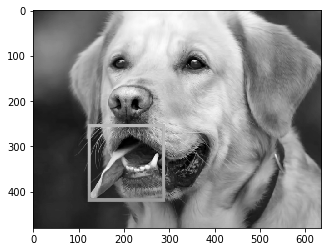

In [43]:
img_path = 'cnn_img/q20.png'
img = cv2.imread(img_path)
gry = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# normalize, rescale entries to lie in [0,1]
gry = gry.astype("float32")/255
gry
plt.imshow(gry, cmap = 'gray')

In [48]:
# Define a filter
filter_vals = np.array([[-1, -1, 1, 1], 
                        [-1, -2, 2, 1], 
                        [-1, -2, 2, 1], 
                        [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [49]:
# Defining four different filters, 
# all of which are linear combinations of the `filter_vals` defined above

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# For an example, print out the values of filter 1
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -2  2  1]
 [-1 -2  2  1]
 [-1 -1  1  1]]


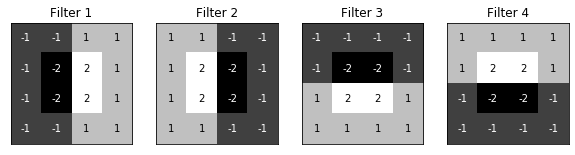

In [50]:
# visualize all four filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

# Define a convolutional layer
The various layers that make up any neural network are documented, here. For a convolutional neural network, we'll start by defining a Convolutional layer.

Initialize a single convolutional layer so that it contains all your created filters. Note that you are not training this network; you are initializing the weights in a convolutional layer so that you can visualize what happens after a forward pass through this network!

 **"__init__ and forward"**

To define a neural network in PyTorch, you define the layers of a model in the function __init__ and define the forward behavior of a network that applyies those initialized layers to an input (x) in the function forward. In PyTorch we convert all inputs into the Tensor datatype, which is similar to a list data type in Python.

Below, I define the structure of a class called Net that has a convolutional layer that can contain four 4x4 grayscale filters.

In [54]:
# define a neural network with a single convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self,weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, 
                    #     stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        
    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        return conv_x, activated_x

#### ReLU activation

In this model, we've used an activation function that scales the output of the convolutional layer. We've chose a ReLU function to do this, and this function simply turns all negative pixel values in 0's (black). See the equation pictured below for input pixel values, `x`. 


In [56]:
# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)
model

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)

# Visualize the output of each filter¶
First, we'll define a helper function, viz_layer that takes in a specific layer and number of filters (optional argument), and displays the output of that layer once an image has been passed through.

In [61]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

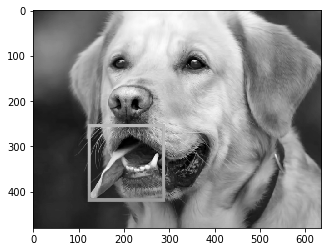

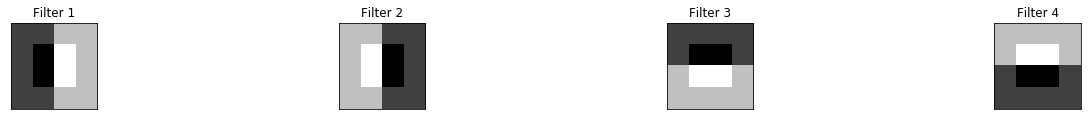

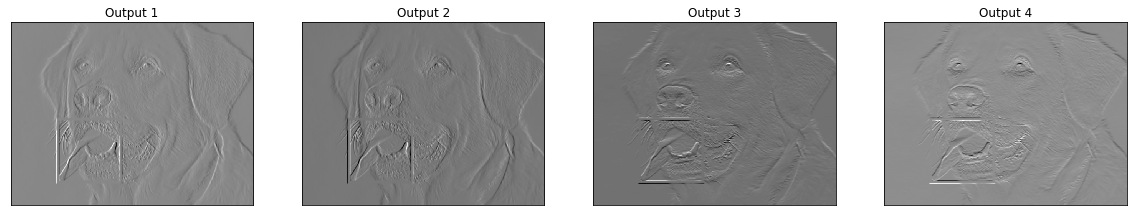

In [60]:
# Let's look at the output of a convolutional layer,
# before and after a ReLu activation function is applied.


# plot original image
plt.imshow(gry, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gry).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)

As you can see, each filter detects some features better than others (i.e horizontal, vertical and different intensities) Thus it is important to diversify the filters applied in the convolution layer.

![q](cnn_img/q21.png)


# Color Images

What about pictures with colour (3- Dimensions)? They are intepreted as (Height, Width, Depth) and depth is 3 (RGB). Thus we will need our filters to be 3-D as well by adding a depth equivalent to the image. We often refer to this as a stack of 2D filters

![q](cnn_img/q22.png)
![q](cnn_img/q23.png)

The resultant images from all our different filters are then stacked to form the input to our next convolutional layer. From there each image in the stack is then expanded on by the next convolutional layer to discover deeper features from the first set of features. 

![q](cnn_img/q24.png)

---
# The Gist

This is repeated for several layers and makes up a part of the CNN. This is different from out MLP where:

***Dense Layers*** - are made of nodes that are "Fully Connected" to every node from the previous layer.

***Convolutional Layers*** - locally connected where the nodes are only connected to a small subset of nodes from the previous layer. (i.e nodes corresponding to a single filter)
There is also an added idea of weight sharing.

***Both weights and biases (whether in the form of feature kernals or a connection in a MLP) are randomly generated initially and are updated along the way.***

***We will always specify loss functions to score an output. For multi-classification models this will be categorical-cross entropy loss (Softmax).Then as we train the model through backpropagation, the weights of the feature maps are updated to reduce the loss. In other words, the CNN determines which features it MUST detect in order to classify the model accurately***

# Stride and Padding

We can control the behaviour of a convolutional layer by specifying the number, size and weights of the filters. These are all hyperparameters that can affect the outcome:

1. Increase Number of Filters - Increase Number of Nodes
2. Increase Size of Filters - Increase Size of Detected Pattern

One more hyperparameter is the ***stride***.

***stride*** - The amount by which the filter slides over the image. Default is is one pixel which results in a calculation for each pixel

![q](cnn_img/q25.png)

If we have a stride of two, the feature map's size (stack of filtered images) is reduce by roughly two. It is also important to note what happens on the edge of filtering. Lets say we have a 4x4 fitler that has a stride of 2 units. We would result in a situation like this:

![q](cnn_img/q27.png)

What could we do? We should pad these addition regions with a value of 0 to complete our feature map and have a standard output size.